In [17]:
import torch
import numpy as np
from hysteresis.base import TorchHysteresis
from hysteresis.training import train_torch
from hysteresis.visualization import plot_hysteresis_density
import matplotlib.pyplot as plt

In [18]:
fname = 'D:/SLAC/hysteresis/magnet_characterization/strplt.ru7'

data = []
with open(fname,'r') as f:
    f.readline()
    for line in f:
        temp = line.rstrip().split(' ')
        d = []
        for ele in temp:
            if ele != '':
                d += [ele]
        data += [d]
data = np.asfarray(data)
data[:, 1] = data[:, 1]
data[:, 3] = data[:, 3]

# get real h, m
h = torch.tensor(data[:,1]).double()
m = torch.tensor(data[:,3]).double()

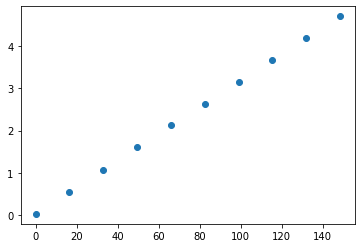

In [19]:
fig,ax = plt.subplots()
ax.plot(h, m,'o')

In [20]:

# normalize h, m
h = (h - torch.min(h)) / (torch.max(h) - torch.min(h))
m = ((m - torch.mean(m)) / (max(m) - min(m)))*2.0 - 1.0

slope = (torch.max(m) - torch.min(m)) / \
        (torch.max(h) - torch.min(h))
scale = torch.std(m - slope * h - torch.min(m)) ** -1

def transform_m(m):
    return (m - slope * h - torch.min(m)) * scale
m = transform_m(m)

h_train = h
m_train = m

In [21]:
# fit using normal hysteresis model
H = TorchHysteresis(h_train, mesh_scale = 0.1)

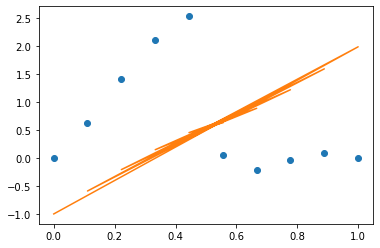

In [22]:
fig,ax = plt.subplots()
ax.plot(h_train, m_train,'o')
ax.plot(h_train, H.predict_magnetization_from_applied_fields().detach())

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
tensor(1.8305e-07, dtype=torch.float64)
tensor(1.9862e-08, dtype=torch.float64)
Parameter containing:
tensor([11.1443], dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor([11.1443], dtype=torch.float64, requires_grad=True)


C:\Users\RYANRO~1\AppData\Local\Temp/ipykernel_31184/1438081651.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.min(torch.tensor(loss_trace)))


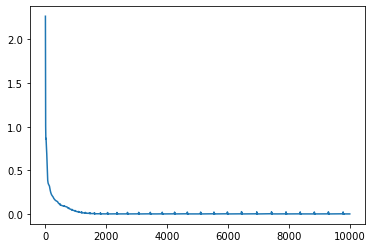

In [23]:
# train on data
loss_trace = train_torch(H, m_train, 10000, lr=0.1, atol=1e-8)
fig, ax = plt.subplots()
ax.plot(loss_trace)
print(loss_trace[-1])
print(torch.min(torch.tensor(loss_trace)))
print(H.offset)
print(H.scale)

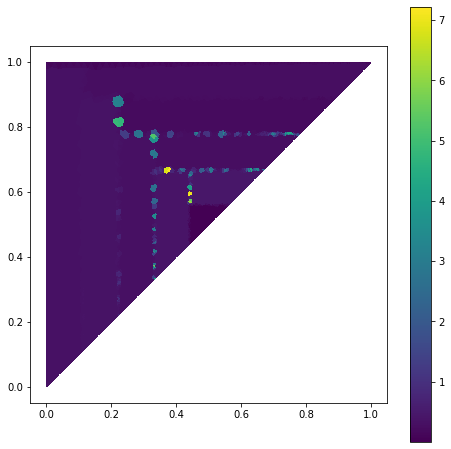

In [24]:
fig, ax = plot_hysteresis_density(H)
ax.set_aspect('equal')
fig.set_size_inches(8,8)

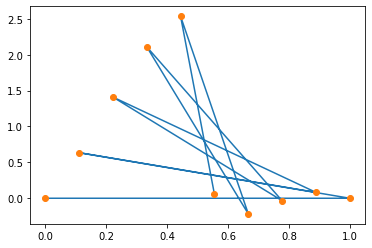

In [25]:
def fit(x):
    return 2.0*x - 1.0

fig, ax = plt.subplots()
m_pred = H.predict_magnetization_from_applied_fields()
ax.plot(h_train, m_pred.detach() )
ax.plot(h_train, m_train,'o')
